## Imports

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the data
tweets_df = pd.read_csv('tweets.csv')

In [ ]:
tweets_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
tweets_df.shape

(11370, 5)

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
tweets_df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


## EDA

<Axes: xlabel='target', ylabel='count'>

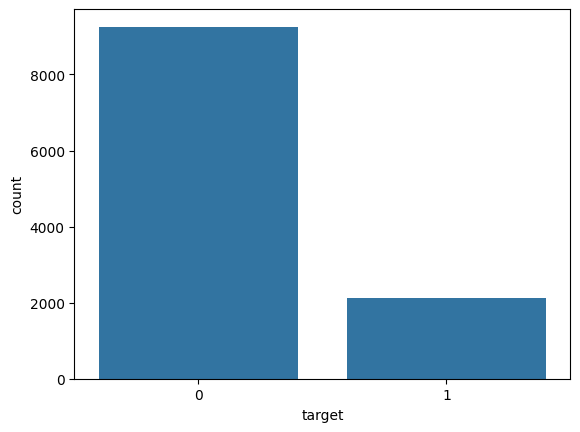

In [ ]:
sns.countplot(x='target',data=tweets_df) #Dataset Is Imbalanced

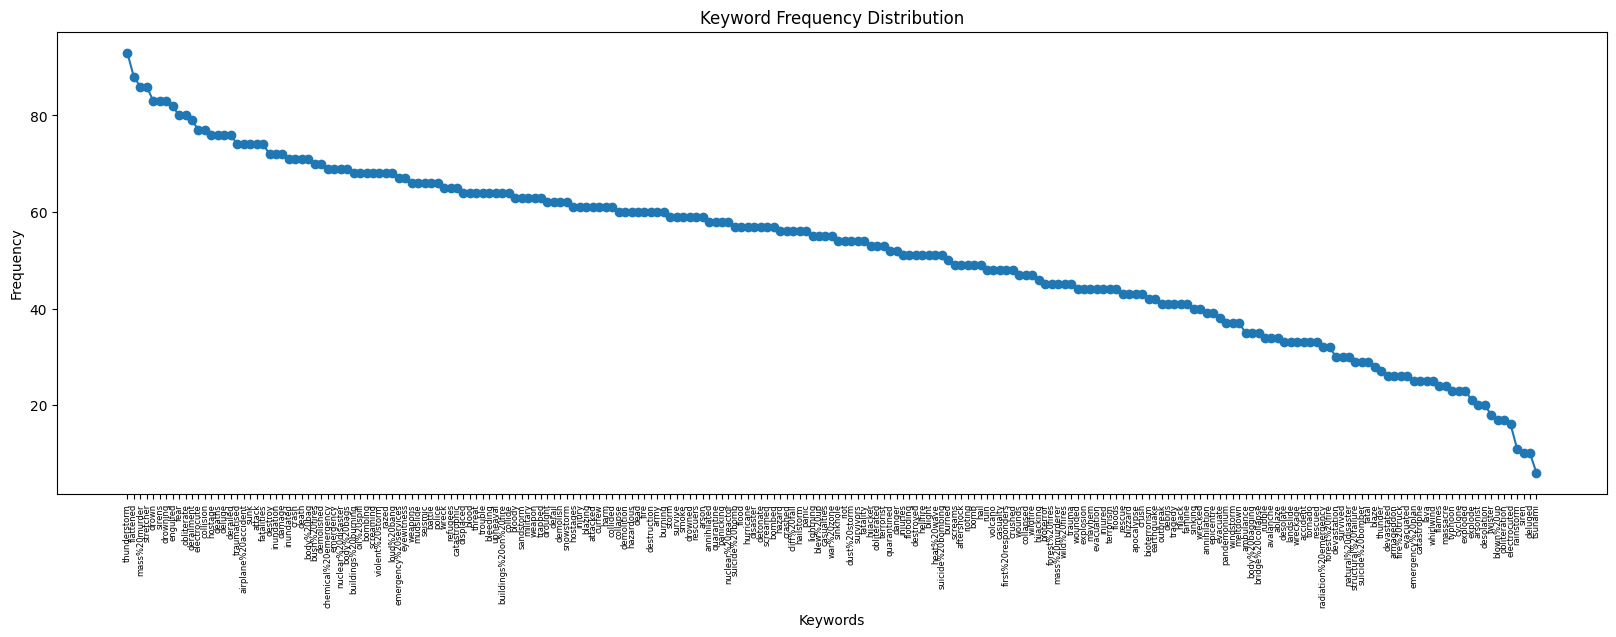

In [ ]:
data = tweets_df['keyword'].value_counts().to_dict()

# Extract keys and values
x = list(data.keys())
y = list(data.values())

# Create a larger figure for better readability
plt.figure(figsize=(20, 6))

# Create a line plot for keyword frequency distribution
plt.plot(x, y, marker='o')  # Add marker='o' for better visibility of points
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keyword Frequency Distribution')
plt.xticks(rotation=90, fontsize=6)  # Rotate x-axis labels for better readability and reduce font size
plt.show()


## Data Preprocessing

In [ ]:
# Remove duplicates
tweets_df.drop_duplicates(subset='text', inplace=True)

In [ ]:
# Handle missing values
tweets_df.dropna(subset=['text'], inplace=True)

In [ ]:
tweets_df['target'].value_counts()

target
0    9153
1    2070
Name: count, dtype: int64

In [ ]:
'''df_0 = tweets_df[tweets_df['target'] == 0] # Getting all data with target = 0
df_0 = df_0.sample(tweets_df[tweets_df['target'] == 1].shape[0]) # From 9152 selecting 2070
df_0.shape

df_1 = tweets_df[tweets_df['target'] == 1] # Getting all data with target = 1

final_df = pd.concat([df_0,df_1],axis = 0) # Concat both dataset
final_df = final_df.sample(final_df.shape[0]) #Resampling The dataset
final_df.shape'''

"df_0 = tweets_df[tweets_df['target'] == 0] # Getting all data with target = 0\ndf_0 = df_0.sample(tweets_df[tweets_df['target'] == 1].shape[0]) # From 9152 selecting 2070\ndf_0.shape\n\ndf_1 = tweets_df[tweets_df['target'] == 1] # Getting all data with target = 1\n\nfinal_df = pd.concat([df_0,df_1],axis = 0) # Concat both dataset\nfinal_df = final_df.sample(final_df.shape[0]) #Resampling The dataset\nfinal_df.shape"

In [ ]:
'''final_df['target'].value_counts()'''

"final_df['target'].value_counts()"

### Data Cleaning

In [ ]:
import re
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(re.compile('<.*?>'),'',text) # Removing Html Tags
    text = re.sub('\[.*?\]', '', text) # Remove square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub('\n', '', text) # Remove new line (/n)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)# Remove non-alphanumeric characters
    # text = re.sub('\w*\d\w*', '', text)  # Removes Digit But in this case it make be Important
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

In [ ]:
# Apply preprocessing
'''final_df['cleaned_text'] = final_df['text'].apply(preprocess_text)'''
tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

In [ ]:
#final_df = final_df[['cleaned_text','target']].reset_index().drop('index',axis=1)
final_df = tweets_df[['cleaned_text','target']].reset_index().drop('index',axis=1)
final_df.head()

,cleaned_text,target
0,communal violence bhainsa telangana stone pelt...,1
1,telangana section 144 imposed bhainsa january ...,1
2,arsonist set car ablaze dealership,1
3,arsonist set car ablaze dealership,1
4,lord jesus love brings freedom pardon fill hol...,0


In [ ]:
import os
os.makedirs('dataset',exist_ok=True)
os.makedirs('models', exist_ok=True)

final_df.to_csv('dataset/Final_dataset.csv')

train test and vaidataion data seperation

In [ ]:
from sklearn.model_selection import train_test_split

df, val_df = train_test_split(final_df, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
#test_df = test_df.drop('target',axis=1)
#val_df = val_df.drop('target',axis=1)
train_df.to_csv('dataset/train.csv')
val_df.to_csv('dataset/val.csv')
test_df.to_csv('dataset/test.csv')

# Step 6: Split the data into training and testing sets
X_train = train_df['cleaned_text']
y_train = train_df['target']

X_test = test_df['cleaned_text']
y_test = test_df['target']

X_val = val_df['cleaned_text']
y_val = val_df['target']

## Word to vec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data for Word2Vec
cleaned_text = final_df['cleaned_text'].tolist()
target = final_df['target']  # Replace 'target' with the actual name of your target column

word_corpus = []

for sentence in cleaned_text:
    # Perform sentence tokenization
    sentences = sent_tokenize(sentence)

    for sub_sentence in sentences:
        # Perform word tokenization
        tokens = word_tokenize(sub_sentence.lower())
        word_corpus.append(tokens)

# Step 2: Train the Word2Vec model
model = Word2Vec(sentences=word_corpus, vector_size=11000, window=5, min_count=5, workers=4)

# Step 3: Compute Word2Vec features
def get_word2vec_features(text, model, vector_size=11000):
    words = word_tokenize(text.lower())
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

word2vec_features = np.array([get_word2vec_features(text, model) for text in cleaned_text])

word2vec_df = pd.DataFrame(word2vec_features)

# Print the first 5 rows of the Word2Vec features
print(word2vec_df.head())
print('Word to Vec Shape',word2vec_df.shape)

      0         1         2         3         4         5         6      \
0  0.001933  0.000580  0.002918  0.000921  0.000771  0.001317  0.001343   
1  0.000917  0.000291  0.001396  0.000423  0.000353  0.000621  0.000628   
2  0.001618  0.000481  0.002531  0.000793  0.000665  0.001164  0.001109   
3  0.001668  0.000514  0.002463  0.000756  0.000649  0.001065  0.001121   
4  0.000657  0.000220  0.000972  0.000324  0.000303  0.000435  0.000363   

      7         8         9      ...     10990     10991     10992     10993  \
0 -0.001107 -0.002067  0.001239  ... -0.001530 -0.002225  0.000153  0.000775   
1 -0.000520 -0.000946  0.000586  ... -0.000760 -0.001058  0.000071  0.000348   
2 -0.000939 -0.001846  0.001204  ... -0.001304 -0.002046  0.000185  0.000661   
3 -0.000899 -0.001706  0.001136  ... -0.001294 -0.001904  0.000078  0.000627   
4 -0.000331 -0.000689  0.000399  ... -0.000517 -0.000658  0.000065  0.000228   

      10994     10995     10996     10997     10998     10999  
0 -0

In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_df, target, test_size=0.2, random_state=42)

# Step 7: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = svm_model.predict(X_test)

# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6256038647342995
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       428
           1       0.60      0.66      0.63       400

    accuracy                           0.63       828
   macro avg       0.63      0.63      0.63       828
weighted avg       0.63      0.63      0.63       828



## Combined Word to and tfidf

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data for Word2Vec
cleaned_text = final_df['cleaned_text'].tolist()
target = final_df['target']  # Replace 'target' with the actual name of your target column

word_corpus = []

for sentence in cleaned_text:
    # Perform sentence tokenization
    sentences = sent_tokenize(sentence)

    for sub_sentence in sentences:
        # Perform word tokenization
        tokens = word_tokenize(sub_sentence.lower())
        word_corpus.append(tokens)

# Step 2: Train the Word2Vec model
model = Word2Vec(sentences=word_corpus, vector_size=150, window=5, min_count=5, workers=4)

# Save the Word2Vec model
model.save("word2vec_model.model")
print("Word2Vec model saved.")

# Step 3: Compute Word2Vec features
def get_word2vec_features(text, model, vector_size=150):
    words = word_tokenize(text.lower())
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

word2vec_features = np.array([get_word2vec_features(text, model) for text in cleaned_text])

word2vec_df = pd.DataFrame(word2vec_features)

# Print the first 5 rows of the Word2Vec features
print(word2vec_df.head())
print('Word to Vec Shape',word2vec_df.shape)

Word2Vec model saved.
        0         1         2         3         4         5         6    \
0  0.002874 -0.007472 -0.046856 -0.006520  0.005024 -0.025490  0.004750   
1  0.001551 -0.003894 -0.032522 -0.006625  0.001543 -0.017203  0.006936   
2  0.003524 -0.008666 -0.058097 -0.010015  0.005591 -0.032404  0.011783   
3  0.006962 -0.010593 -0.064598 -0.013763  0.005580 -0.035212  0.011542   
4 -0.000926 -0.001738 -0.030357 -0.006061  0.005707 -0.016846  0.005431   

        7         8         9    ...       140       141       142       143  \
0  0.100551  0.009889  0.044161  ...  0.016795  0.025295  0.051365  0.050040   
1  0.066766  0.008395  0.028719  ...  0.009912  0.018387  0.031315  0.032267   
2  0.126678  0.014286  0.055426  ...  0.016895  0.031565  0.063486  0.058019   
3  0.133519  0.014585  0.054949  ...  0.017147  0.036511  0.070555  0.061570   
4  0.068735  0.004864  0.030786  ...  0.009251  0.017914  0.038609  0.033899   

        144       145       146       147     

In [ ]:
import joblib
# Step 4: Compute TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_text).toarray()

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_plus_w2v_vectorizer.pkl")
print("TF-IDF vectorizer saved.")
print('tfidf Shape',tfidf_matrix.shape)

TF-IDF vectorizer saved.
tfidf Shape (4140, 10833)


In [ ]:
# Step 5: Combine Word2Vec and TF-IDF features
combined_features = np.hstack((word2vec_features, tfidf_matrix))
combined_features.shape

(4140, 10983)

In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, target, test_size=0.2, random_state=42)

# Step 7: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = svm_model.predict(X_test)

# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8019323671497585
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       380
           1       0.86      0.75      0.80       448

    accuracy                           0.80       828
   macro avg       0.80      0.81      0.80       828
weighted avg       0.81      0.80      0.80       828



## TFIDF

In [ ]:
import joblib
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 4: Compute TF-IDF features
tfidf_vectorizer = TfidfVectorizer()

X_train_new = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_new = tfidf_vectorizer.transform(X_test).toarray()
X_val_new = tfidf_vectorizer.transform(X_val).toarray()

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "models/tfidf_vectorizer.joblib")
print("TF-IDF vectorizer saved.")
print('tfidf Shape',X_train_new.shape)

TF-IDF vectorizer saved.
tfidf Shape (7182, 15892)


## Training All Model Using Tfidf

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


# List of classifiers to test
classifiers = {
    'SVM': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    #'NaiveBayes': MultinomialNB(),
    'MLP': MLPClassifier(max_iter=300)
}

result = {}

# Train, evaluate, and save each classifier
for name, clf in classifiers.items():
    print(f"Training {name} model...")
    clf.fit(X_train_new, y_train)
    y_pred = clf.predict(X_test_new)

    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    result[name] = accuracy_score(y_test, y_pred)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    # Save the trained model
    joblib.dump(clf, f"models/{name}_model.joblib")
    print(f"{name} model saved.")

result_df = pd.DataFrame(result.items(), columns=['Classifier', 'Accuracy'])
print(result_df)

Training SVM model...


Accuracy for SVM: 0.888641425389755
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1468
           1       0.83      0.49      0.62       328

    accuracy                           0.89      1796
   macro avg       0.86      0.74      0.78      1796
weighted avg       0.88      0.89      0.88      1796

SVM model saved.
Training RandomForest model...
Accuracy for RandomForest: 0.8780623608017817
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1468
           1       0.85      0.40      0.55       328

    accuracy                           0.88      1796
   macro avg       0.87      0.69      0.74      1796
weighted avg       0.88      0.88      0.86      1796

RandomForest model saved.
Training LogisticRegression model...
Accuracy for LogisticRegression: 0.8674832962138085
Classification Report for Logi

### Hyper parameter tunning for Random Forest using Grid Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib
from scipy.stats import randint

# Load datasets
'''
train_df = pd.read_csv('dataset/train.csv')
val_df = pd.read_csv('dataset/val.csv')
test_df = pd.read_csv('dataset/test.csv')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.joblib')

# Handle NaN values by replacing them with an empty string
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
val_df['cleaned_text'] = val_df['cleaned_text'].fillna('')
test_df['cleaned_text'] = test_df['cleaned_text'].fillna('')

# Split the data into features and target variables
X_train = train_df['cleaned_text']
y_train = train_df['target']
X_val = val_df['cleaned_text']
y_val = val_df['target']
X_test = test_df['cleaned_text']
y_test = test_df['target']

# Transform the text data using the TF-IDF vectorizer
X_train_new = tfidf_vectorizer.transform(X_train).toarray()
X_val_new = tfidf_vectorizer.transform(X_val).toarray()
X_test_new = tfidf_vectorizer.transform(X_test).toarray()
'''


# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid
param_dist = {
    'n_estimators': randint(100, 501),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train_new, y_train)

# Evaluate the best model
print(f"Best parameters found: {random_search.best_params_}")

# Use the best model to make predictions on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_new)

# Save the best model
joblib.dump(best_rf, "models/best_rf_model.pkl")
print(f'Best Random Forest Model saved.')

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=406; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=406; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   1.7s
[CV] END bootstrap=True, max_depth=40, max_featu

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py", line 638, in _vali

KeyboardInterrupt: 

### Hyper parameter tunning for SVM using RandomSearch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib
from scipy.stats import randint
from sklearn.svm import SVC

# Load datasets

train_df = pd.read_csv('dataset/train.csv')
val_df = pd.read_csv('dataset/val.csv')
test_df = pd.read_csv('dataset/test.csv')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.joblib')

# Handle NaN values by replacing them with an empty string
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
val_df['cleaned_text'] = val_df['cleaned_text'].fillna('')
test_df['cleaned_text'] = test_df['cleaned_text'].fillna('')

# Split the data into features and target variables
X_train = train_df['cleaned_text']
y_train = train_df['target']
X_val = val_df['cleaned_text']
y_val = val_df['target']
X_test = test_df['cleaned_text']
y_test = test_df['target']

# Transform the text data using the TF-IDF vectorizer
X_train_new = tfidf_vectorizer.transform(X_train).toarray()
X_val_new = tfidf_vectorizer.transform(X_val).toarray()
X_test_new = tfidf_vectorizer.transform(X_test).toarray()


param_dist = {
    'C': np.logspace(-1, 2, 5),  # Reduced range for quicker execution
    'gamma': np.logspace(-3, 0, 4),  # Reduced range for quicker execution
    'kernel': ['rbf', 'linear']  # Fewer kernels for quicker execution
}
svc = SVC(random_state=42)
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train the best SVM model on the entire training dataset
best_svm = random_search.best_estimator_
best_svm.fit(X_train_new, y_train)

# Save the best model to a file
joblib_file = "models/best_svm.joblib"
joblib.dump(best_svm, joblib_file)
print(f"Best SVM model saved to {joblib_file}")

# Predict and evaluate using the test dataset
test_predictions_svm = best_svm.predict(X_test_new)
print("\nSupport Vector Machine after Hyperparameter Tuning")
print(classification_report(y_test, test_predictions_svm))

Best hyperparameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 3.1622776601683795}
Best cross-validation score: 0.8785853522695627
Best SVM model saved to models/best_svm.joblib

Support Vector Machine after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1468
           1       0.70      0.60      0.65       328

    accuracy                           0.88      1796
   macro avg       0.81      0.77      0.79      1796
weighted avg       0.88      0.88      0.88      1796



### Model Testing Using tfidf and svm best model on test data

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the models
tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.joblib')
best_svm_model = joblib.load('models/best_svm.joblib')

# Load the test dataset
test_df = pd.read_csv('dataset/test.csv')

# Drop rows with NaNs in 'cleaned_text' column
test_df = test_df.dropna(subset=['cleaned_text'])

# Assuming modified_test_dataset is your test dataset DataFrame
x_test_modified_df = test_df['cleaned_text']
x_test_modified_df.to_csv('dataset/modified_test_dataset_without_label.csv', index=False)

# Transform test data
X_test_new = tfidf_vectorizer.transform(x_test_modified_df).toarray()

# Make predictions
predictions = best_svm_model.predict(X_test_new)

# Add predictions to the DataFrame
test_df['Predicted_Target'] = predictions

# Select columns of interest
modified_test_dataset = test_df[['cleaned_text', 'Predicted_Target']]

# Save to CSV
modified_test_dataset.to_csv('predicted_xtest_label_using_svm_model.csv', index=False)

# Print a sample to verify
print(modified_test_dataset.head())


                                        cleaned_text  Predicted_Target
0  mark 63044 jesus feed five thousand 30 apostle...                 0
1  injustice must stopped home sikh victim displa...                 0
2  six people confirmed dead several others injur...                 1
3  venezuela countryside collapsing capital hum p...                 0
4          weekend violence leaf 6 dead philadelphia                 0


In [ ]:
modified_test_dataset.to_csv('dataset/predicted_xtarget_sing_model.csv')

### Code to work with simple 1 text as input by user

In [ ]:
import joblib
import string
import nltk
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.joblib')
best_rf_model = joblib.load('models/RandomForest_model.joblib')

import re
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(re.compile('<.*?>'),'',text) # Removing Html Tags
    text = re.sub('\[.*?\]', '', text) # Remove square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub('\n', '', text) # Remove new line (/n)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)# Remove non-alphanumeric characters
    # text = re.sub('\w*\d\w*', '', text)  # Removes Digit But in this case it make be Important
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

def predict_sentiment(text,tfidf_vectorizer,best_rf_model):
  text = preprocess_text(text)
  X_new = tfidf_vectorizer.transform([text]).toarray()
  prediction = best_rf_model.predict(X_new)
  if prediction[0] == 0:
    return 'Not a Disaster'
  elif prediction[0] == 1:
    return 'Disaster'


[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
predict_sentiment(text='turn australia isnt blazing climate change blazing vast amount arsonist started',tfidf_vectorizer=tfidf_vectorizer,best_rf_model=best_rf_model)

'Disaster'

In [2]:
import os
import shutil

def zip_current_directory(zip_name):
    # Get the current working directory
    cwd = os.getcwd()
    
    # Define the base name for the zip file (without extension)
    base_name = os.path.join(cwd, zip_name)
    
    # Create a zip archive of the current directory
    shutil.make_archive(base_name, 'zip', cwd)

# Name of the zip file (without extension)
zip_name = 'nlp_project'

# Call the function to zip the current directory
zip_current_directory(zip_name)

print(f"Zipped current directory into {zip_name}.zip")
